<a href="https://colab.research.google.com/github/SVJLucas/ApprAuto2023/blob/main/2_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's Import the Libraries to be used:


## 1. Let's download the libraries we'll be using

In [ ]:
!pip install feature-engine

## 2. Let's import the libraries

Libraries for data visualization:

In [ ]:
import numpy as np
import  pandas as pd
import  seaborn as sns
import  scipy.stats as stats
import  matplotlib.pyplot as plt

import  plotly
import  plotly.graph_objs as go
import  plotly.io as pio
from plotly.subplots import make_subplots
import  plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import  cufflinks as cf
import  plotly.figure_factory as ff
from plotly.offline import iplot
from plotly import tools
from ipywidgets import widgets

from matplotlib.colors import to_rgba

plt.style.use('seaborn-darkgrid')

# You can go offline on demand by using
cf.go_offline()
# initiate notebook for offline plot
init_notebook_mode(connected=False)

# set some display options:
plt.rcParams['figure.dpi'] = 100
colors = px.colors.qualitative.Prism
pio.templates.default = "plotly_white"
plotly.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

<ipython-input-193-f092bd6ec2a9>:21: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



Libraries for data analysis:

In [ ]:
from sklearn.model_selection import train_test_split
from feature_engine.imputation import CategoricalImputer
from feature_engine import transformation as vt
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.imputation import AddMissingIndicator
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import DropDuplicateFeatures

Let's log in and access google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
target_variable_names=['nb_train_retard_arrivee',
                       'nb_annulation',
                       'nb_train_depart_retard',
                       'retard_moyen_depart',
                       'retard_moyen_tous_trains_depart',
                       'retard_moyen_tous_trains_arrivee',
                       'retard_moyen_arrivee',
                       'duree_moyenne',
                       'nb_train_retard_sup_15',
                       'retard_moyen_trains_retard_sup15',
                       'nb_train_retard_sup_30',
                       'nb_train_retard_sup_60',
                       'prct_cause_externe',
                       'prct_cause_infra',
                       'prct_cause_gestion_trafic',
                       'prct_cause_materiel_roulant',
                       'prct_cause_gestion_gare',
                       'prct_cause_prise_en_charge_voyageurs']

In [ ]:
X_train=pd.read_csv('/content/drive/MyDrive/ML-3A/Data/train.csv')
y_train=X_train[['year','retard_moyen_trains_retard_sup15','commentaires_retard_arrivee','commentaires_retard_arrivee_lag1','commentaire_annulation','commentaire_annulation_lag1','commentaire_retards_depart','commentaire_retards_depart_lag1','prct_cause_externe_lag1','prct_cause_infra_lag1','prct_cause_gestion_trafic_lag1','prct_cause_materiel_roulant_lag1','prct_cause_gestion_gare_lag1','prct_cause_prise_en_charge_voyageurs_lag1']+target_variable_names]
X_train.drop(columns=target_variable_names+['year','Unnamed: 0','commentaires_retard_arrivee','commentaires_retard_arrivee_lag1','commentaire_annulation','commentaire_annulation_lag1','commentaire_retards_depart','commentaire_retards_depart_lag1'],inplace=True)


X_valid=pd.read_csv('/content/drive/MyDrive/ML-3A/Data/validation.csv')
y_valid=X_valid[['year','retard_moyen_trains_retard_sup15','commentaires_retard_arrivee','commentaires_retard_arrivee_lag1','commentaire_annulation','commentaire_annulation_lag1','commentaire_retards_depart','commentaire_retards_depart_lag1','prct_cause_externe_lag1','prct_cause_infra_lag1','prct_cause_gestion_trafic_lag1','prct_cause_materiel_roulant_lag1','prct_cause_gestion_gare_lag1','prct_cause_prise_en_charge_voyageurs_lag1']+target_variable_names]
X_valid.drop(columns=target_variable_names+['year','Unnamed: 0','commentaires_retard_arrivee','commentaires_retard_arrivee_lag1','commentaire_annulation','commentaire_annulation_lag1','commentaire_retards_depart','commentaire_retards_depart_lag1'],inplace=True)


X_test=pd.read_csv('/content/drive/MyDrive/ML-3A/Data/test.csv')
y_test=X_test[['year','retard_moyen_trains_retard_sup15','commentaires_retard_arrivee','commentaires_retard_arrivee_lag1','commentaire_annulation','commentaire_annulation_lag1','commentaire_retards_depart','commentaire_retards_depart_lag1','prct_cause_externe_lag1','prct_cause_infra_lag1','prct_cause_gestion_trafic_lag1','prct_cause_materiel_roulant_lag1','prct_cause_gestion_gare_lag1','prct_cause_prise_en_charge_voyageurs_lag1']+target_variable_names]
X_test.drop(columns=target_variable_names+['year','Unnamed: 0','commentaires_retard_arrivee','commentaires_retard_arrivee_lag1','commentaire_annulation','commentaire_annulation_lag1','commentaire_retards_depart','commentaire_retards_depart_lag1'],inplace=True)

In [ ]:
X_train

month   service           gare_depart         gare_arrivee  \
0         5  National                 TOURS   PARIS MONTPARNASSE   
1        11  National            PARIS NORD                ARRAS   
2         1  National    VALENCE ALIXAN TGV           PARIS LYON   
3         3  National            PARIS LYON  AIX EN PROVENCE TGV   
4         4  National  MARSEILLE ST CHARLES      MARNE LA VALLEE   
...     ...       ...                   ...                  ...   
5702      5  National            PARIS LYON  AIX EN PROVENCE TGV   
5703      3  National    PARIS MONTPARNASSE              QUIMPER   
5704     12  National        MULHOUSE VILLE           PARIS LYON   
5705      6  National            PARIS NORD            DUNKERQUE   
5706      8  National             ANGOULEME   PARIS MONTPARNASSE   

      nb_train_prevu service_lag1  duree_moyenne_lag1  nb_train_prevu_lag1  \
0                175     National                75.0                174.0   
1                270     National                49.0                300.0   
2                280          NaN                 NaN                  NaN   
3                275     National               182.0                284.0   
4                236     National               213.0                248.0   
...              ...          ...                 ...                  ...   
5702             403     National               183.0                383.0   
5703             248     National               222.0                216.0   
5704             338     National               169.0                323.0   
5705             243     National               118.0                251.0   
5706             220     National               132.0                236.0   

      nb_annulation_lag1  nb_train_depart_retard_lag1  ...  \
0                   36.0                         18.0  ...   
1                    4.0                        110.0  ...   
2                    NaN                          NaN  ...   
3                    1.0                         23.0  ...   
4                    0.0                         37.0  ...   
...                  ...                          ...  ...   
5702                 0.0                         21.0  ...   
5703                 2.0                         17.0  ...   
5704                 1.0                        155.0  ...   
5705                 0.0                        149.0  ...   
5706                35.0                        119.0  ...   

      nb_train_retard_sup_15_lag1  retard_moyen_trains_retard_sup15_lag1  \
0                            12.0                               5.165942   
1                            17.0                              38.016667   
2                             NaN                                    NaN   
3                            21.0                              59.119841   
4                            30.0                               6.755108   
...                           ...                                    ...   
5702                         25.0                               3.495953   
5703                         24.0                              72.083333   
5704                         22.0                              47.566667   
5705                         18.0                              33.000000   
5706                         33.0                              10.430514   

      nb_train_retard_sup_30_lag1  nb_train_retard_sup_60_lag1  \
0                             5.0                          1.0   
1                             8.0                          4.0   
2                             NaN                          NaN   
3                            12.0                          6.0   
4                            15.0                          5.0   
...                           ...                          ...   
5702                         10.0                          2.0   
5703                         16.0                         10.0   


In [ ]:
X_train.columns

Index(['month', 'service', 'gare_depart', 'gare_arrivee', 'nb_train_prevu',
       'service_lag1', 'duree_moyenne_lag1', 'nb_train_prevu_lag1',
       'nb_annulation_lag1', 'nb_train_depart_retard_lag1',
       'retard_moyen_depart_lag1', 'retard_moyen_tous_trains_depart_lag1',
       'nb_train_retard_arrivee_lag1', 'retard_moyen_arrivee_lag1',
       'retard_moyen_tous_trains_arrivee_lag1', 'nb_train_retard_sup_15_lag1',
       'retard_moyen_trains_retard_sup15_lag1', 'nb_train_retard_sup_30_lag1',
       'nb_train_retard_sup_60_lag1', 'prct_cause_externe_lag1',
       'prct_cause_infra_lag1', 'prct_cause_gestion_trafic_lag1',
       'prct_cause_materiel_roulant_lag1', 'prct_cause_gestion_gare_lag1',
       'prct_cause_prise_en_charge_voyageurs_lag1'],
      dtype='object')

# Data Preprocessing

## Categorical Features - Missing Label

Let's first separate categorical and numerical variables:

In [ ]:
def get_categorical_variables(df):
    return df.select_dtypes(include='object').columns

def get_numerical_variables(df):
    return df.select_dtypes(exclude='object').columns

In [ ]:
categorical_features=get_categorical_variables(X_train).tolist()
numeric_features=get_numerical_variables(X_train).tolist()

Let's start doing the data imputation on these variables. For this type of variable, we'll add the new "Missing" category, so that the model can capture the reason for the missing instance (if it exists).

In [ ]:
# set up the imputer
categorical_imputer = CategoricalImputer()

# fit the imputer
categorical_imputer.fit(X_train)

# transform the data
X_train= categorical_imputer.transform(X_train)
X_valid= categorical_imputer.transform(X_valid)
X_test= categorical_imputer.transform(X_test)

Let's check the new distribution of some categorical variables that had missing data:

In [ ]:
def verify_pct_of_categories(X_train,feature_names):
  total_samples=len(X_train)
  for feature in feature_names:
    temp_df=pd.Series(X_train[feature].value_counts()/total_samples)
    fig=temp_df.sort_values(ascending=False).plot.bar(color="#FFE680")
    fig.axhline(y=0.05,color='red')
    fig.set_ylabel(f'Percentual of {feature}')
    plt.show()

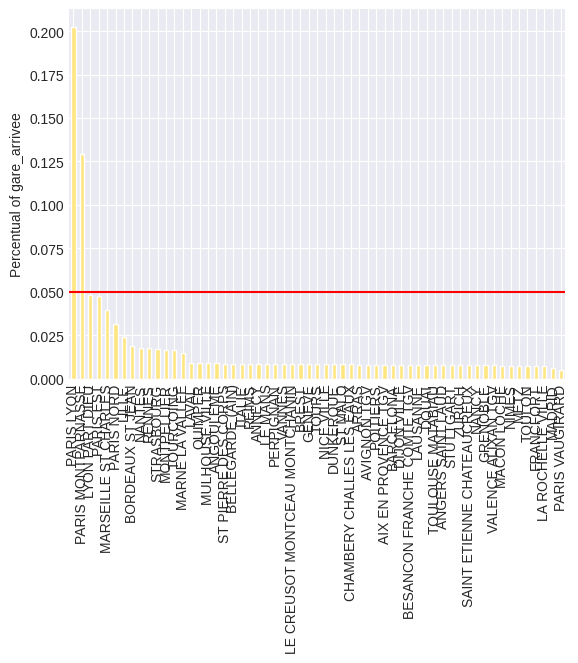

In [ ]:
verify_pct_of_categories(X_train,['gare_arrivee'])

We can see that the "Missing" category has indeed been added to the dataset.

## Categorical Encoding


Having added the "Missing" category to the dataset, performing *categorical imputation*, we are now going to use **DecisionTreeEncoder** to try to capture a monotonic relationship between the categories and the target.

In [ ]:
import pandas as pd
from feature_engine.encoding import DecisionTreeEncoder
woe_encoder = DecisionTreeEncoder(cv=2)

# fit the encoder
woe_encoder.fit(X_train,y_train['retard_moyen_tous_trains_arrivee'])

# transform the data
X_train= woe_encoder.transform(X_train)
X_valid= woe_encoder.transform(X_valid)
X_test= woe_encoder.transform(X_test)

Let's check that the *categorical encoding* has been done correctly:

In [ ]:
#Gráfico de Setores com Percentual de Cada Tipo de Variável
types=X_train.dtypes.value_counts().to_frame().rename(index=str,columns={0:'Kind of Variables'}).reset_index()
types.iplot(kind='pie',
               values='Kind of Variables',
               labels='index',
               title='Kind of Variables',
               textinfo='label+text+percent')

In [ ]:
X_train

month   service  gare_depart  gare_arrivee  nb_train_prevu  \
0         5  5.253777     3.627359      5.676805             175   
1        11  5.253777     3.627359      5.676805             270   
2         1  5.253777     4.291015      5.676805             280   
3         3  5.253777     5.773494      5.676805             275   
4         4  5.253777     7.367810      8.136533             236   
...     ...       ...          ...           ...             ...   
5702      5  5.253777     5.773494      5.676805             403   
5703      3  5.253777     4.189551      4.923102             248   
5704     12  5.253777     4.099208      5.676805             338   
5705      6  5.253777     3.627359      5.884140             243   
5706      8  5.253777     4.725831      5.676805             220   

      service_lag1  duree_moyenne_lag1  nb_train_prevu_lag1  \
0         5.247475                75.0                174.0   
1         5.247475                49.0                300.0   
2         5.746023                 NaN                  NaN   
3         5.247475               182.0                284.0   
4         5.247475               213.0                248.0   
...            ...                 ...                  ...   
5702      5.247475               183.0                383.0   
5703      5.247475               222.0                216.0   
5704      5.247475               169.0                323.0   
5705      5.247475               118.0                251.0   
5706      5.247475               132.0                236.0   

      nb_annulation_lag1  nb_train_depart_retard_lag1  ...  \
0                   36.0                         18.0  ...   
1                    4.0                        110.0  ...   
2                    NaN                          NaN  ...   
3                    1.0                         23.0  ...   
4                    0.0                         37.0  ...   
...                  ...                          ...  ...   
5702                 0.0                         21.0  ...   
5703                 2.0                         17.0  ...   
5704                 1.0                        155.0  ...   
5705                 0.0                        149.0  ...   
5706                35.0                        119.0  ...   

      nb_train_retard_sup_15_lag1  retard_moyen_trains_retard_sup15_lag1  \
0                            12.0                               5.165942   
1                            17.0                              38.016667   
2                             NaN                                    NaN   
3                            21.0                              59.119841   
4                            30.0                               6.755108   
...                           ...                                    ...   
5702                         25.0                               3.495953   
5703                         24.0                              72.083333   
5704                         22.0                              47.566667   
5705                         18.0                              33.000000   
5706                         33.0                              10.430514   

      nb_train_retard_sup_30_lag1  nb_train_retard_sup_60_lag1  \
0                             5.0                          1.0   
1                             8.0                          4.0   
2                             NaN                          NaN   
3                            12.0                          6.0   
4                            15.0                          5.0   
...                           ...                          ...   
5702                         10.0                          2.0   
5703                         16.0                         10.0   
5704                          8.0                          3.0   
5705                          8.0                          1.0   
5706                         13.0               

As we can see, we have transformed all the categorical variables into numerical variables by means of DTE. With this, we can have a better metric of how each category acts in relation to the target variable. To do this, let's use a *heat map* to check the correlation between the variables:

In [ ]:
def abs_heat_map(X_train,y_train,y_name):
    df=X_train.copy()
    df[y_name]=y_train[y_name].tolist()
    correlated=df.corr(method='kendall')
    correlated=np.abs(correlated)
    fig = go.Figure(data=go.Heatmap(
                                     z=correlated,
                                     x=df.columns.tolist(),
                                     y=df.columns.tolist(),
                                     colorscale='Hot',
                                    ))
    fig.update_layout(
        autosize=False,
        width=1000,
        height=1000,
    )
    fig.show()


In [ ]:
abs_heat_map(X_train,y_train,'retard_moyen_tous_trains_arrivee')

From the graph, we can see that many of the variables are uncorrelated. This is a good thing, as there isn't much redundant information. Let's take a closer look at the correlation between the explanatory variables and the response variable:

In [ ]:
def feature_excitation_spectrum(X_train,y_name):
    df=X_train.copy()
    correlated=df.corr(method='kendall')
    correlated=np.abs(correlated)
    fig = go.Figure(data=go.Heatmap(
                                     z=[correlated.iloc[:][y_name].tolist()],
                                     x=df.columns.tolist(),
                                     y=[y_name],
                                     colorscale='Hot',
                                    ))
    fig.update_layout(
        autosize=False,
        width=1500,
        height=500,
    )
    fig.show()

In [ ]:
feature_excitation_spectrum(X_train.assign(retard_moyen_tous_trains_arrivee=y_train['retard_moyen_tous_trains_arrivee']),'retard_moyen_tous_trains_arrivee')

We can see that many of the variables are uncorrelated. This is a good thing, as there isn't much redundant information. After taking a closer look at the correlation between the explanatory variables and the response variable, we notice that some of variables with the highest correlation with the target are: retard_moyens_tous_trains_arrivee_lag1 (corr=0.39), duree_moyenne_lag1 (corr=0.26), nbr_train_retard_sup_15_lag1 (corr=0.24).

## Missing Indicator

Let's start dealing with numerical variables. To do so, let's first add a missing indicator:

In [ ]:
# set up a woe encoder
missing_indicator_encoder = AddMissingIndicator(variables=numeric_features)

# fit the encoder
missing_indicator_encoder.fit(X_train, y_train['retard_moyen_tous_trains_arrivee'].tolist())

# transform the data
X_train= missing_indicator_encoder.transform(X_train)
X_valid= missing_indicator_encoder.transform(X_valid)
X_test= missing_indicator_encoder.transform(X_test)

Let's check that the missing_indicator columns have been added to the end of the dataset:

In [ ]:
X_train

month   service  gare_depart  gare_arrivee  nb_train_prevu  \
0         5  5.253777     3.627359      5.676805             175   
1        11  5.253777     3.627359      5.676805             270   
2         1  5.253777     4.291015      5.676805             280   
3         3  5.253777     5.773494      5.676805             275   
4         4  5.253777     7.367810      8.136533             236   
...     ...       ...          ...           ...             ...   
5702      5  5.253777     5.773494      5.676805             403   
5703      3  5.253777     4.189551      4.923102             248   
5704     12  5.253777     4.099208      5.676805             338   
5705      6  5.253777     3.627359      5.884140             243   
5706      8  5.253777     4.725831      5.676805             220   

      service_lag1  duree_moyenne_lag1  nb_train_prevu_lag1  \
0         5.247475                75.0                174.0   
1         5.247475                49.0                300.0   
2         5.746023                 NaN                  NaN   
3         5.247475               182.0                284.0   
4         5.247475               213.0                248.0   
...            ...                 ...                  ...   
5702      5.247475               183.0                383.0   
5703      5.247475               222.0                216.0   
5704      5.247475               169.0                323.0   
5705      5.247475               118.0                251.0   
5706      5.247475               132.0                236.0   

      nb_annulation_lag1  nb_train_depart_retard_lag1  ...  \
0                   36.0                         18.0  ...   
1                    4.0                        110.0  ...   
2                    NaN                          NaN  ...   
3                    1.0                         23.0  ...   
4                    0.0                         37.0  ...   
...                  ...                          ...  ...   
5702                 0.0                         21.0  ...   
5703                 2.0                         17.0  ...   
5704                 1.0                        155.0  ...   
5705                 0.0                        149.0  ...   
5706                35.0                        119.0  ...   

      nb_train_retard_sup_15_lag1_na  \
0                                  0   
1                                  0   
2                                  1   
3                                  0   
4                                  0   
...                              ...   
5702                               0   
5703                               0   
5704                               0   
5705                               0   
5706                               0   

      retard_moyen_trains_retard_sup15_lag1_na  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            0   
...                                        ...   
5702                                         0   
5703                                         0   
5704                                         0   
5705                                         0   
5706                                         0   

      nb_train_retard_sup_30_lag1_na  nb_train_retard_sup_60_lag1_na  \
0                                  0                               0   
1                                  0                               0   
2                                  1                               1   
3                                  0                               0   
4                                  0                               0   
...                              ...                             ...   
5702                               0                               0   
5703                         

We noticed that the "Missing Indicators" were successfully added to the dataset.

## Drop NaN

There's NaN only the the training and validation set due the lag features

In [ ]:
X_train=X_train.dropna()
X_valid=X_valid.dropna()
y_train = y_train.loc[X_train.index]
y_valid = y_valid.loc[X_valid.index]

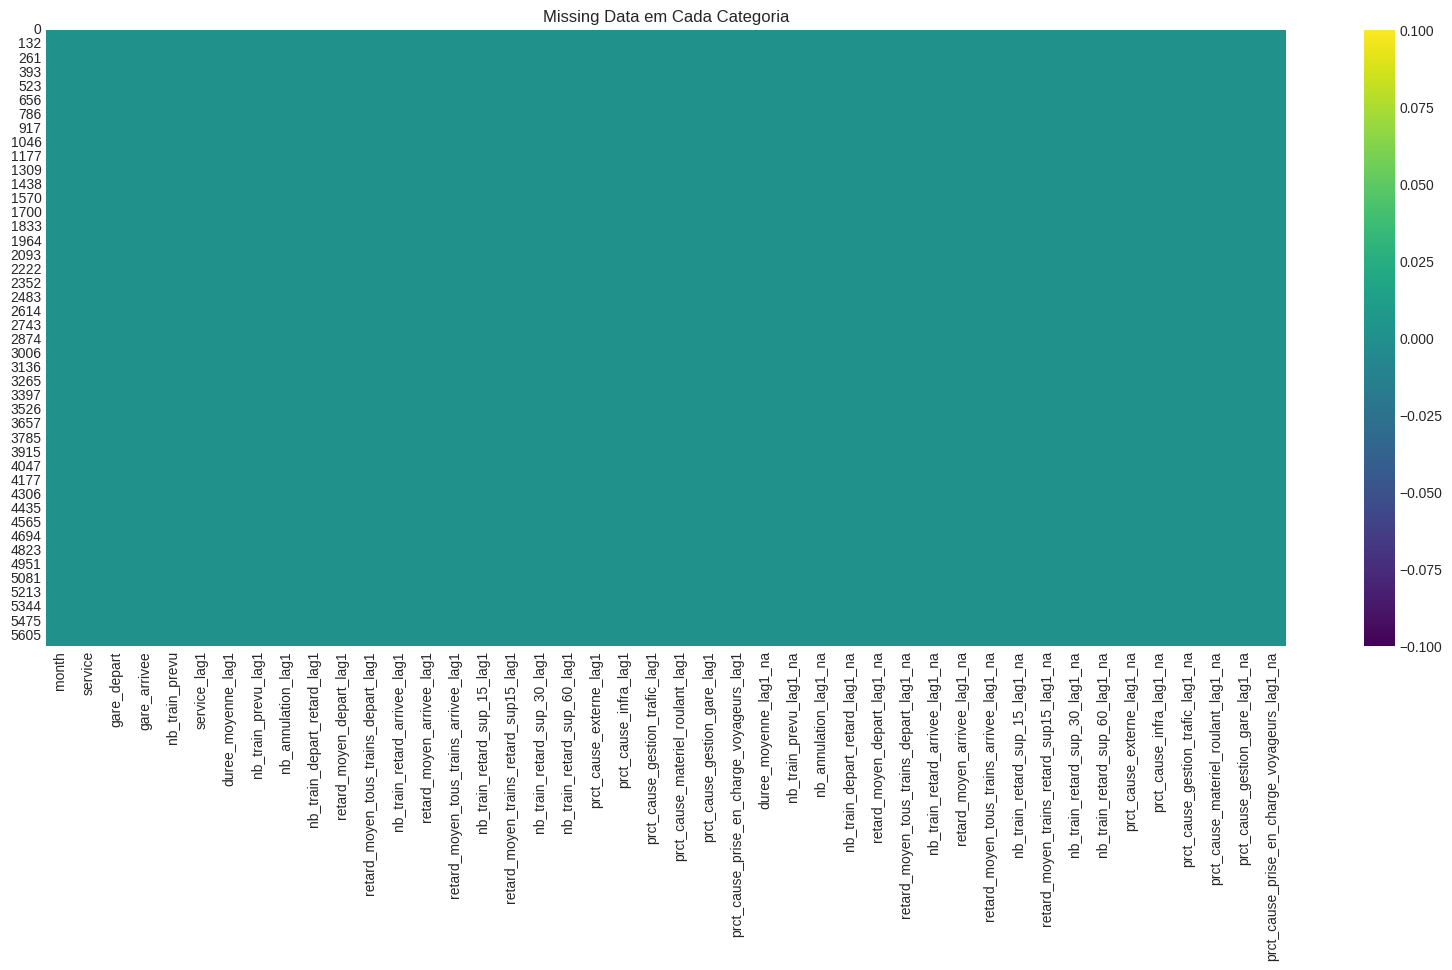

In [ ]:
#HeatMap dos Dados Faltantes
plt.figure(figsize=(20,8));
sns.heatmap(X_train.isnull(), cmap='viridis')
plt.title('Missing Data em Cada Categoria')
plt.show()


As we can see, the graph is in a single tone, which means that there is no missing data in the dataset.

## Transformation of Variables

Let's try to make the variables more symmetrically distributed (which helps in training the models). Let's check some transformations:

In [ ]:
def view_tranformations(X_train,columns_names,transformation_name='YeoJohnson'):

  df_before = pd.DataFrame({'Skew':[X_train[feature].skew() for feature in columns_names],
                              'Feature':[feature for feature in columns_names]})

  if transformation_name in ['log','Log','LOG','ln','logaritmo natural']:
    tf = vt.LogTransformer(variables = columns_names)
    tf.fit(X_train)
    X_tf=tf.transform(X_train)
    df_after = pd.DataFrame({'Skew':[X_tf[feature].skew() for feature in columns_names],
                             'Feature':[feature for feature in columns_names]})
    label='Skewness before and after Log-Transformation'
  elif transformation_name in ['boxcox','Boxcox','box cox','box-cox','Box-cox','Box cox']:
    tf = vt.BoxCoxTransformer(variables = columns_names)
    tf.fit(X_train)
    X_tf=tf.transform(X_train)
    df_after = pd.DataFrame({'Skew':[X_tf[feature].skew() for feature in columns_names],
                                'Feature':[feature for feature in columns_names]})
    label='Skewness before and after Boxcox-Transformation'
  elif transformation_name in ['YeoJohnson','Yeo Johnson','Yeo-Johnson','yeojohnson','yeo johnson','yeo-johnson']:
    tf = vt.YeoJohnsonTransformer(variables = columns_names)
    tf.fit(X_train)
    X_tf=tf.transform(X_train)
    df_after = pd.DataFrame({'Skew':[X_tf[feature].skew() for feature in columns_names],
                                'Feature':[feature for feature in columns_names]})
    label='Skewness before and after YeoJohnson-Transformation'
  elif transformation_name in ['Reciprocal','Inverse','reciprocal','inverse','inverso','reciproco']:
    tf = vt.ReciprocalTransformer(variables = columns_names)
    tf.fit(X_train)
    X_tf=tf.transform(X_train)
    df_after = pd.DataFrame({'Skew':[X_tf[feature].skew() for feature in columns_names],
                                'Feature':[feature for feature in columns_names]})
    label='Skewness before and after Reciprocal-Transformation'
  else:
    raise Exception('\nColoque uma das transformações válidas:\nLog\nBox-Cox\nYeo-Johnson\nReciprocal')


  f, ax = plt.subplots(figsize=(6, 6))
  # Plot the total crashes
  sns.set_color_codes("muted")
  sns.set_style('darkgrid')
  sns.barplot(x="Skew", y="Feature", data=df_before,
              label="Before", alpha=0.5)

  # Plot the crashes where alcohol was involved
  sns.set_color_codes("muted")
  sns.barplot(x="Skew", y="Feature", data=df_after,
              label="After",alpha=1)

  # Add a legend and informative axis label
  ax.legend(ncol=2, loc="best", frameon=True)
  ax.set(ylabel="",
        xlabel=label)
  sns.despine(left=True, bottom=True)
  plt.grid()
  plt.show()


### Transformation **YeoJohnson**:

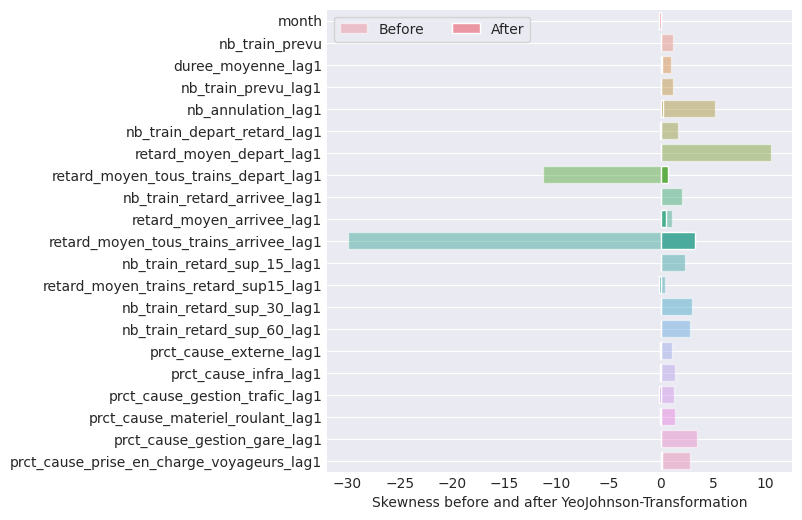

In [ ]:
view_tranformations(X_train,numeric_features)

In [ ]:
yeojohnson_transform=vt.YeoJohnsonTransformer(variables=numeric_features)

yeojohnson_transform.fit(X_train)

X_train=yeojohnson_transform.transform(X_train)
X_valid=yeojohnson_transform.transform(X_valid)
X_test=yeojohnson_transform.transform(X_test)

Let's check the new distributions of these variables to see if the asymmetry has ended:

In [ ]:
def diagnostic_plots(df,variable,lib):
  if lib=='plotly' or lib=='Plotly':
    fig=make_subplots(rows=1, cols=3,subplot_titles=('Histograma','Gráfico QQ','Box-Plot'))
    #Vamos plotar o Histograma
    fig_hist=ff.create_distplot([df[variable].values], [variable])
    fig.add_trace(go.Histogram(fig_hist['data'][0],
                              marker_color='#FFCC00',
                              ), row=1, col=1)

    fig.add_trace(go.Scatter(fig_hist['data'][1],
                         line=dict(color='#FF851B')
                        ), row=1, col=1)
    #Vamos plotar o gráfico QQ
    qq = stats.probplot(df[variable], dist='norm', sparams=(1))
    x = np.array([qq[0][0][0], qq[0][0][-1]])
    qq_df=pd.DataFrame({'x':np.array(qq[0][0].tolist()),
                    'y':np.array(qq[0][1].tolist()),
                    'index':df.index.tolist()},index=None)
    fig_qq=go.Scatter(x=qq_df['x'],
                            y=qq_df['y'],
                            mode='markers',
                            name=variable,
                            text=qq_df['index'],
                            marker_color='rgba(31, 150, 139, 0.9)')

    fig_qq.update(mode='markers', marker_line_width=0.15, marker_size=5)
    fig.append_trace(fig_qq, row=1, col=2)
    fig.append_trace(go.Scatter(x=x,
                                y=qq[1][1] + qq[1][0]*x,
                                mode='lines',
                                name='Normal',
                                marker_color='rgba(255, 90, 0, 0.9)'), row=1, col=2)
    fig.layout.update(title='Resumo da Variável '+ variable)
    #Vamos o gráfico Box-Plot
    fig_box=go.Box(y=df[variable],
                  boxpoints='all',
                  jitter=0.4, # add some jitter for a better separation between points
                  boxmean='sd',
                  text=df.index.tolist(),
                  name='Box-Plot',
                  marker_color='#FFCC00',
                  line_color='#FF851B')
    fig.append_trace(fig_box, row=1, col=3)
    fig.show()

  elif lib=='matplotlib' or lib=='pyplot':
    #function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x=variable, kde=True,color='#E0B100',stat="density")
    plt.title('Histogram')

    # Q-Q plot
    ax=plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    ax.get_lines()[0].set_markersize(7.0)
    ax.get_lines()[0].set_markerfacecolor('#44B1A5')
    ax.get_lines()[0].set_color('#44B1A5')

    ax.get_lines()[1].set_markerfacecolor('#FF7627')
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=variable, data=df,color='#FFCC00',linewidth=2.5)
    sns.swarmplot(y=variable, data=df.iloc[0:300], color="#FFE680")
    plt.title('Boxplot')

    plt.suptitle('Distribuição de '+ variable, fontsize=16)
    plt.show()

  else:
    print('Escolha como library (argumento lib) ou "matplotlib" ou "plotly"!')



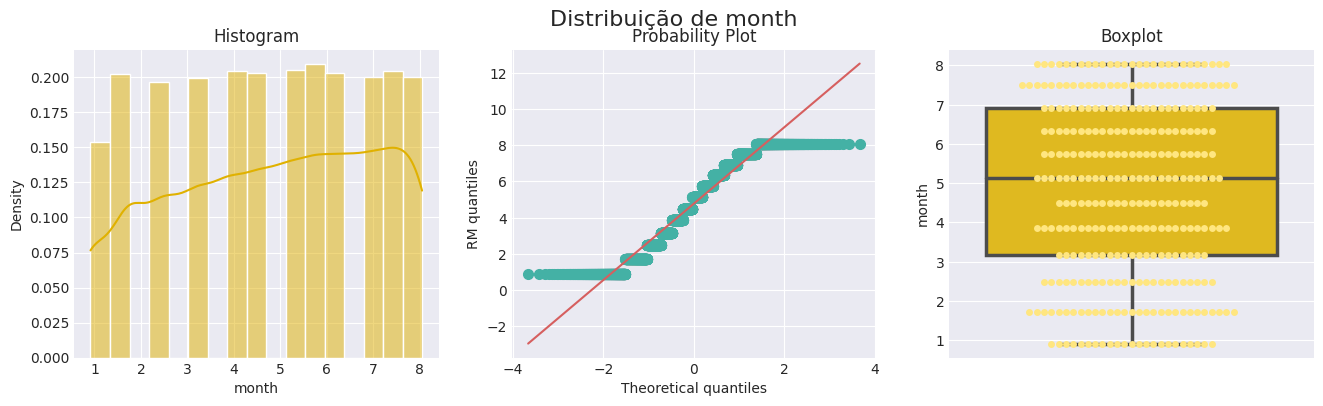

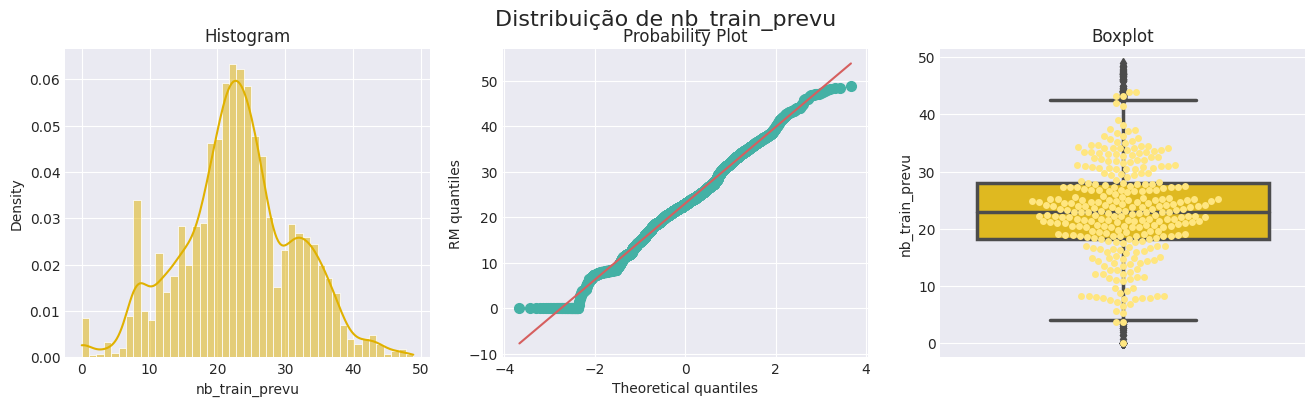

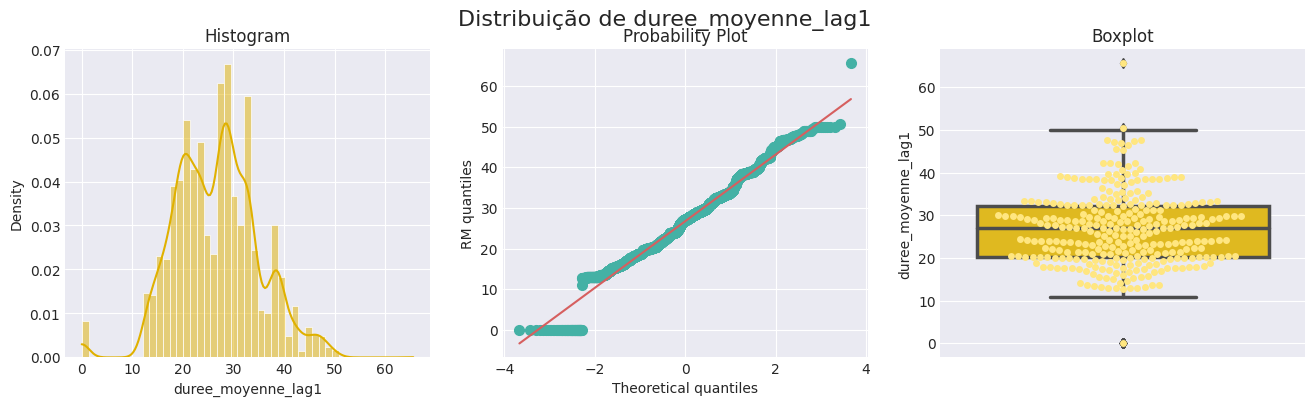

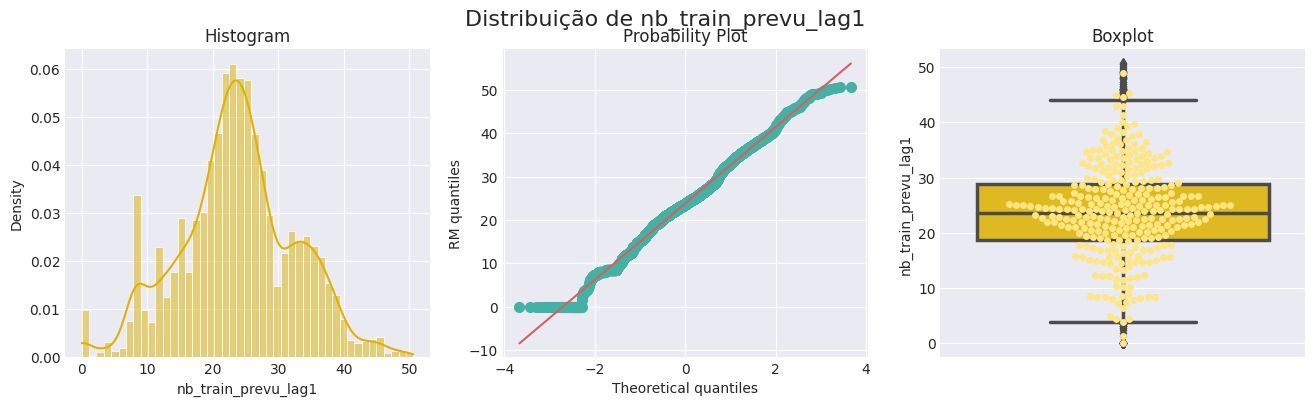

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



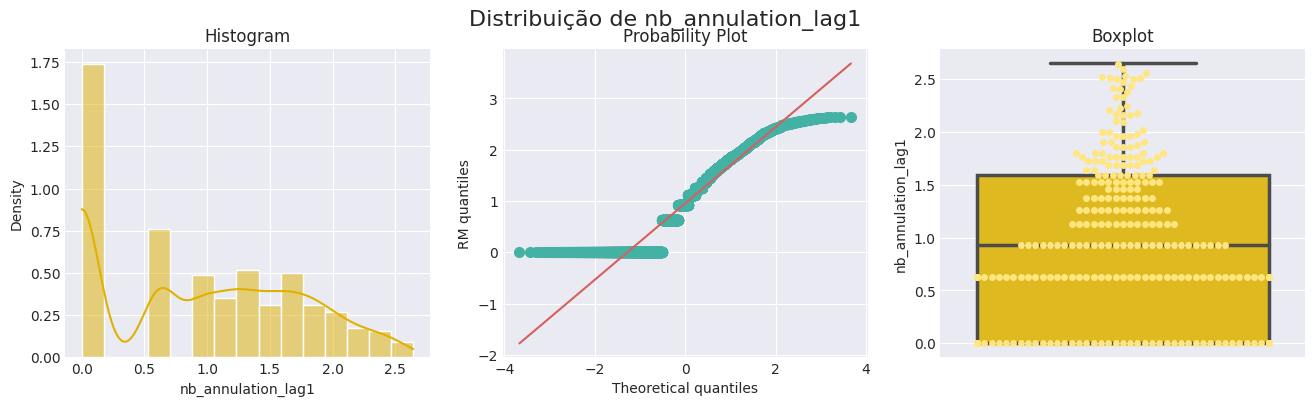

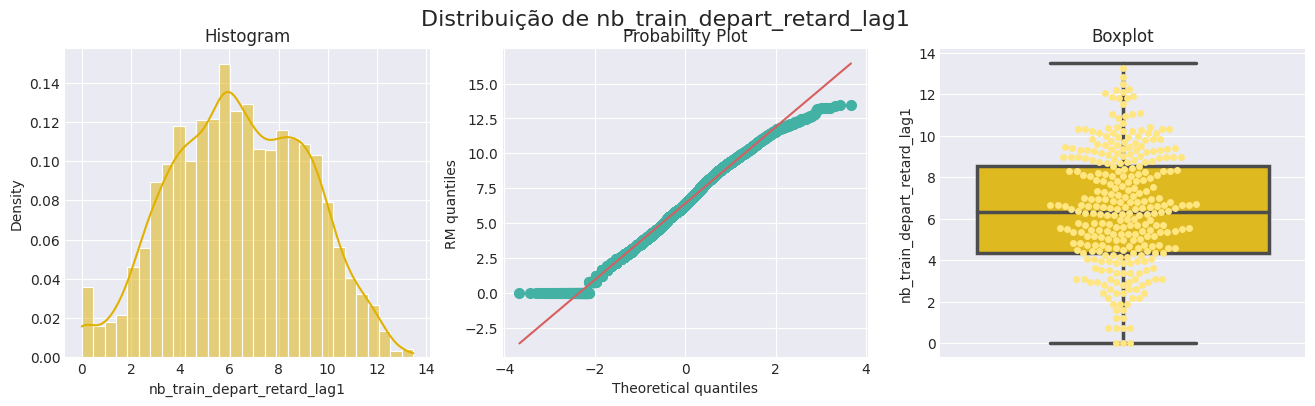

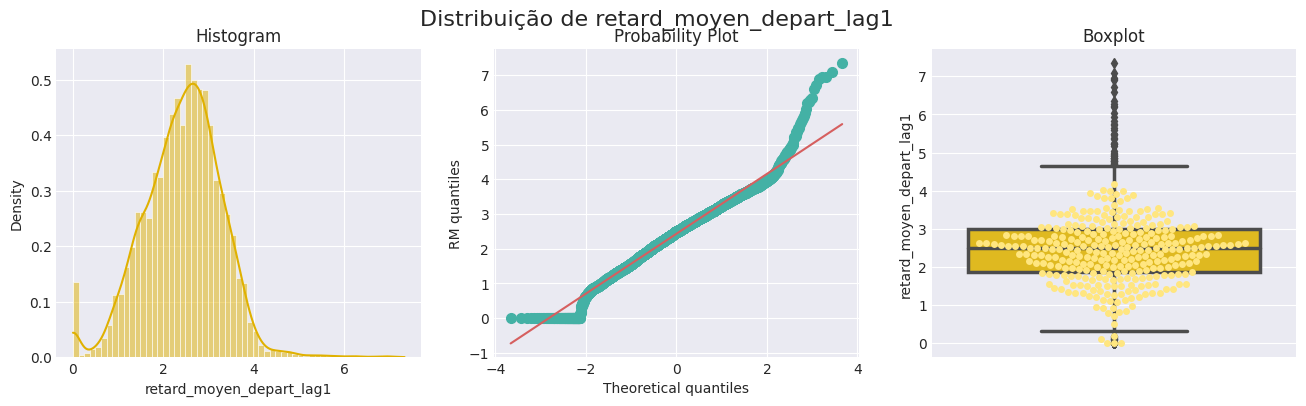

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



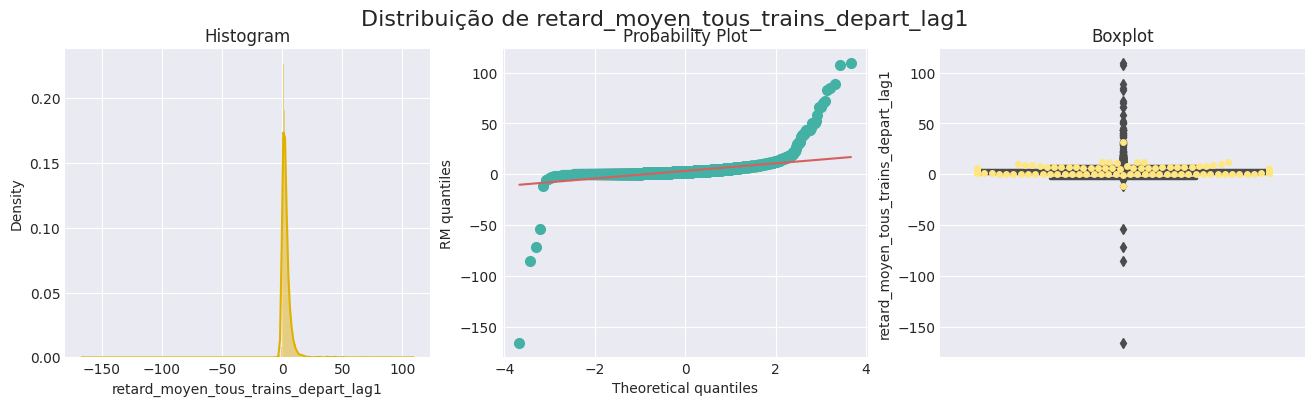

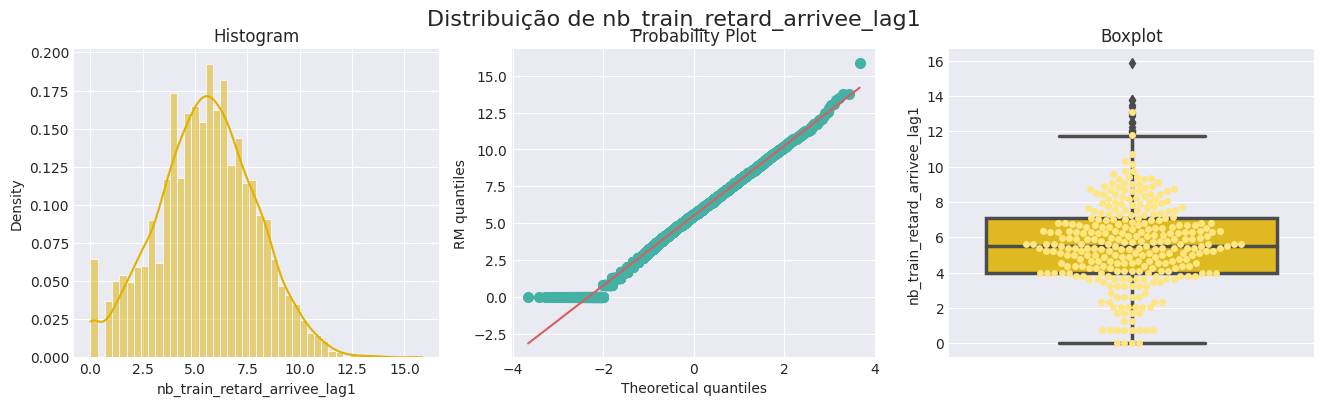

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



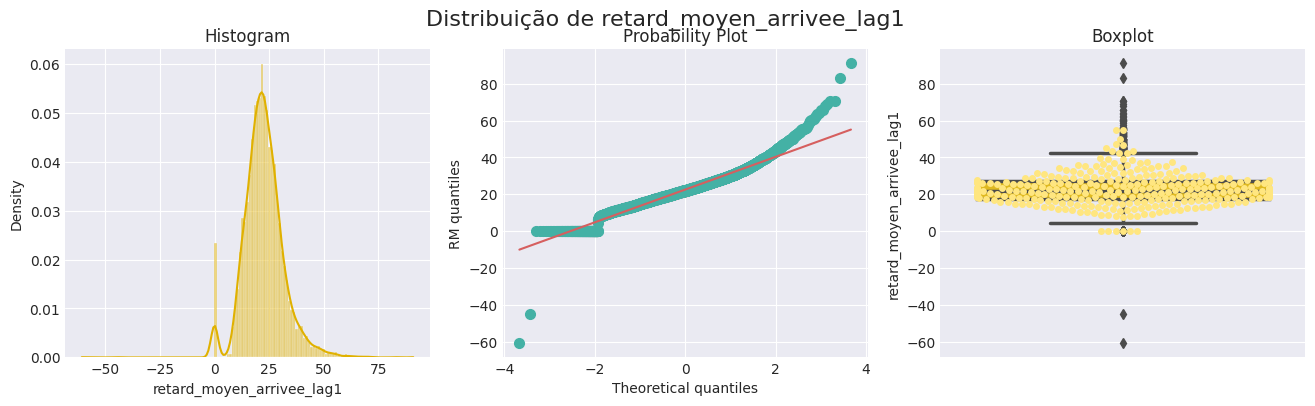

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



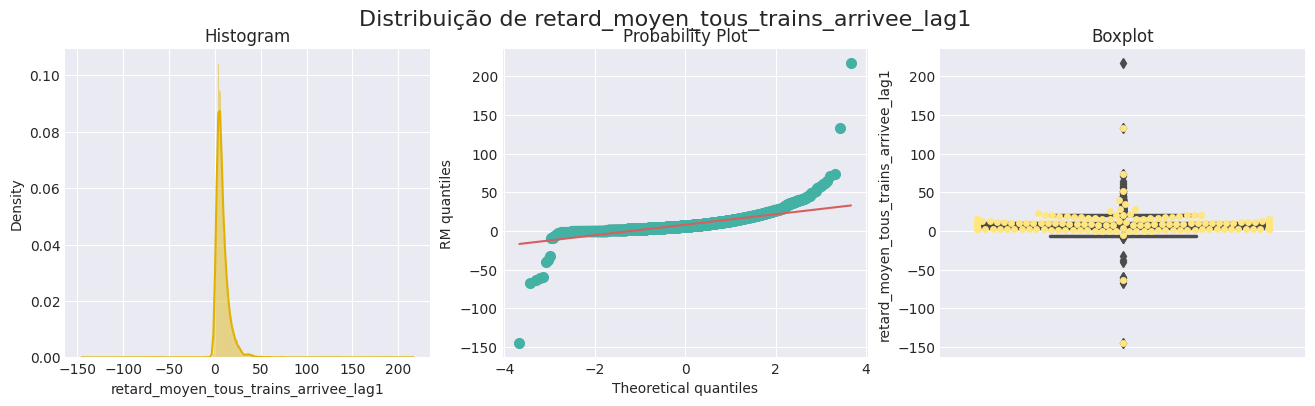

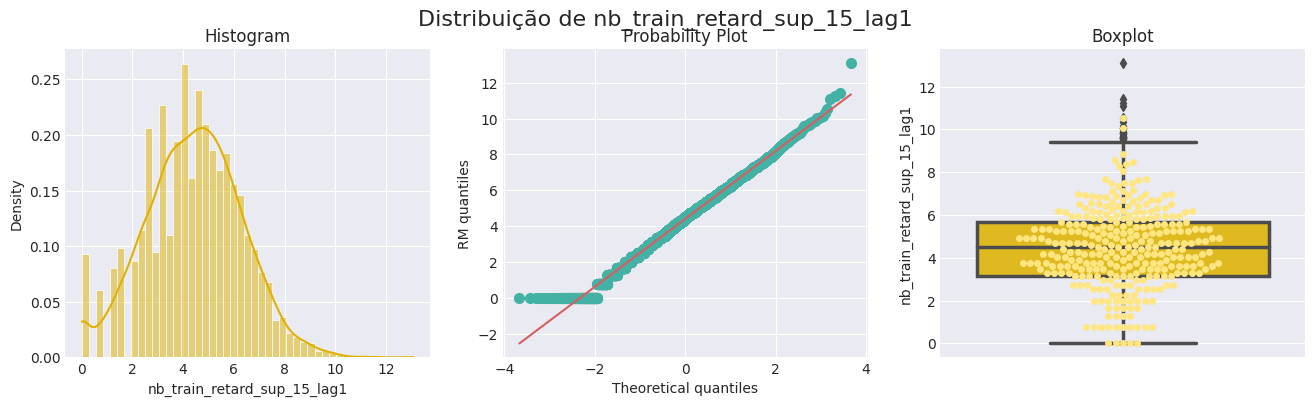

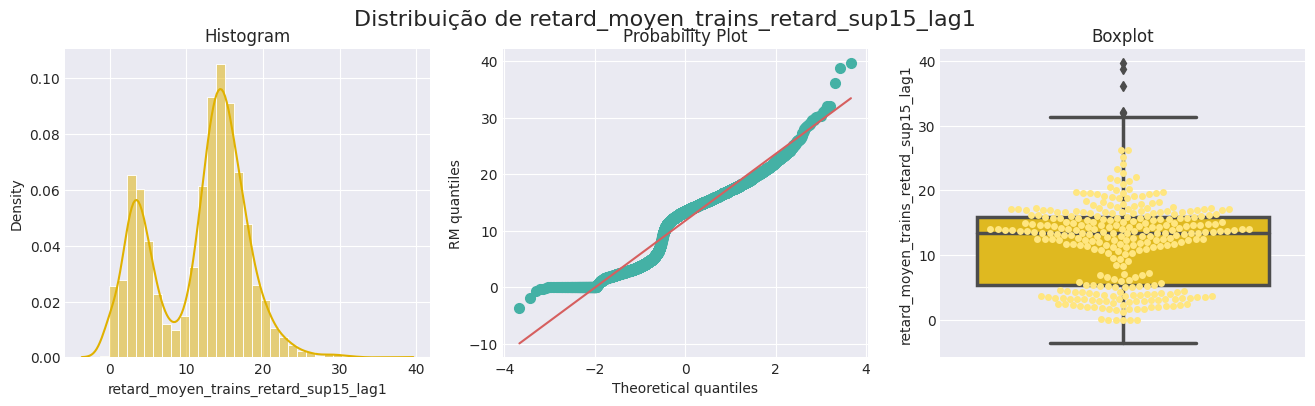

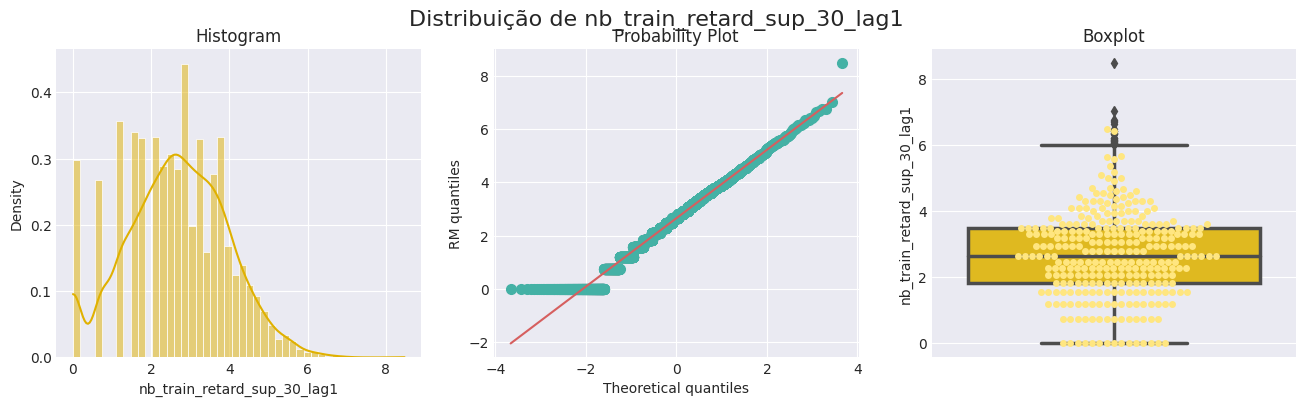

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



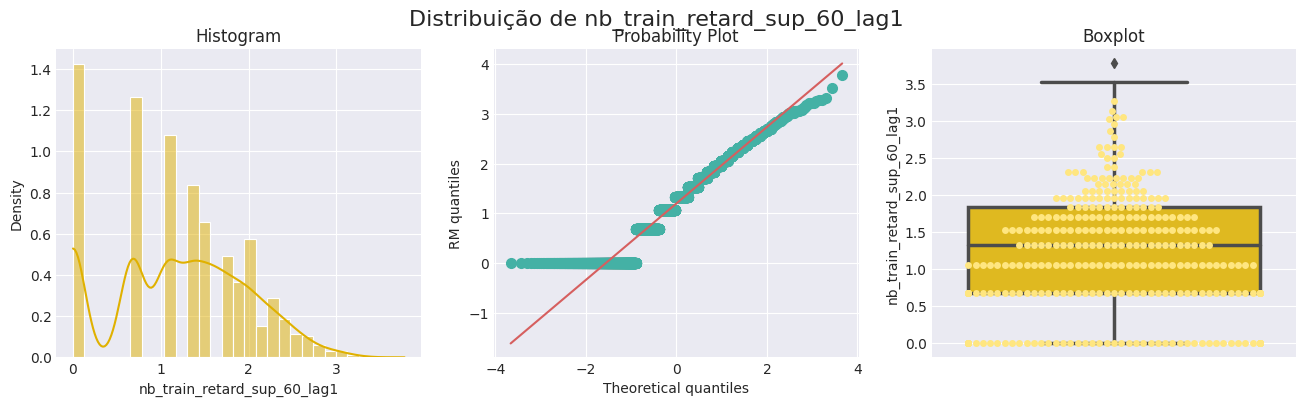

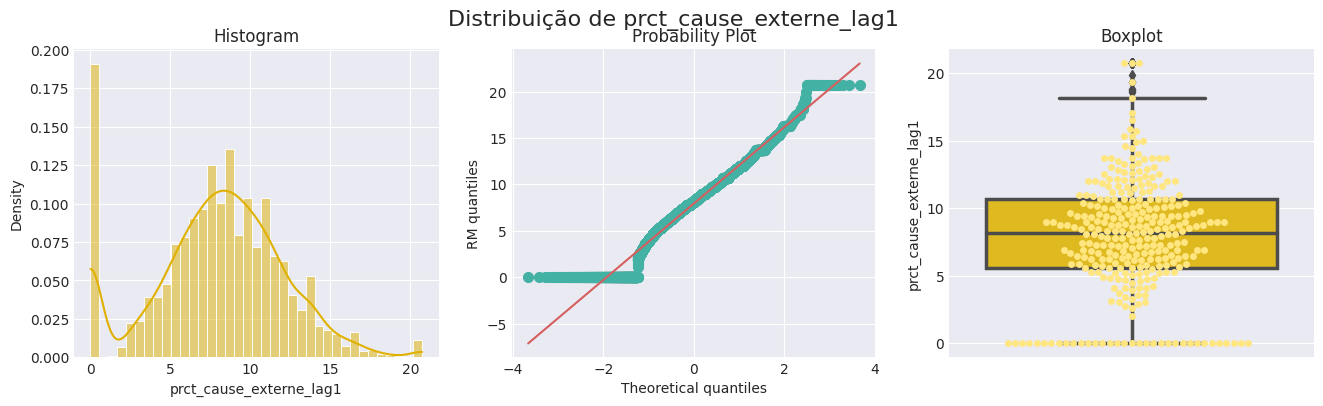

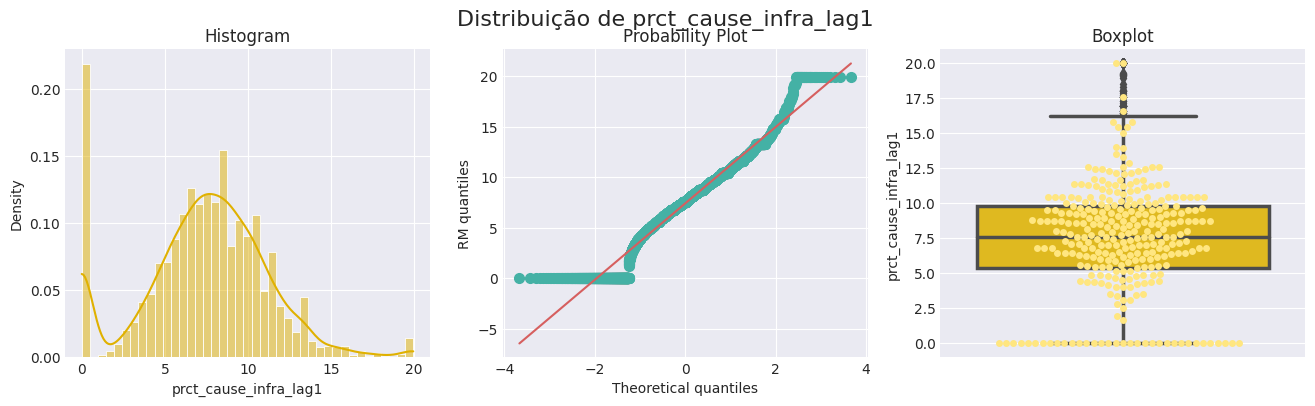

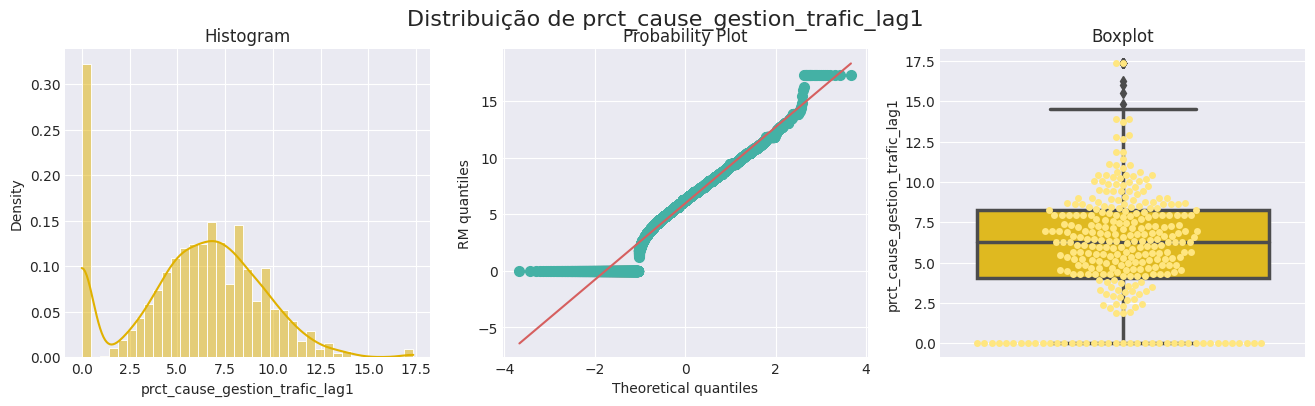

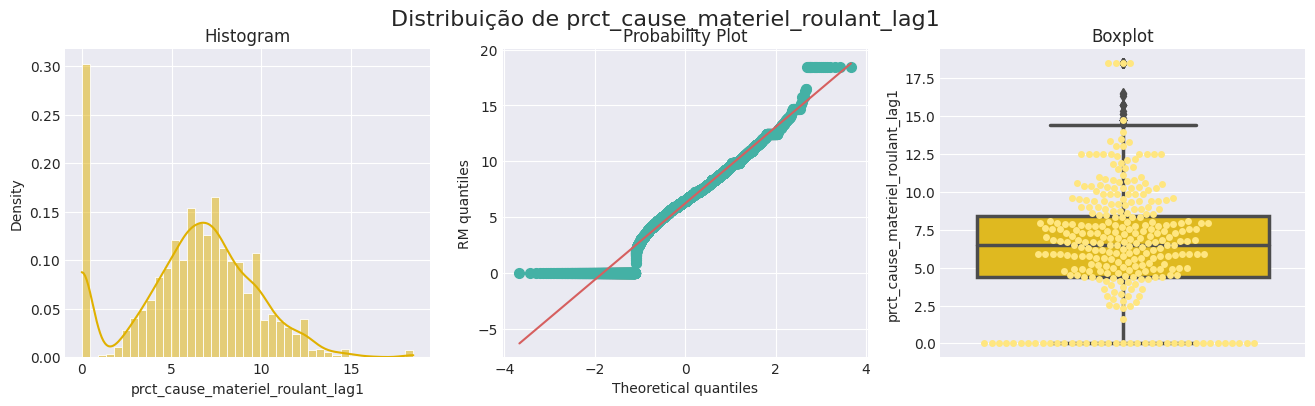

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



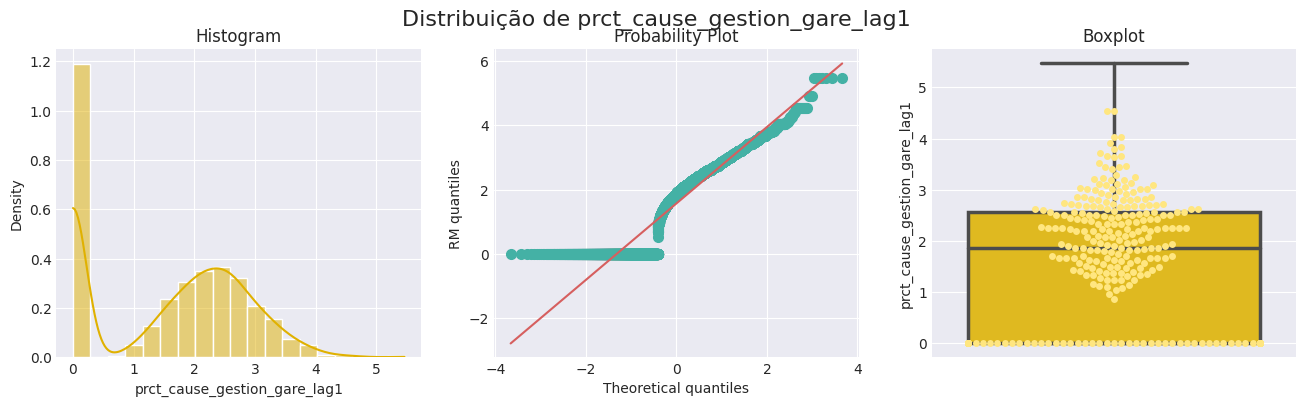

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



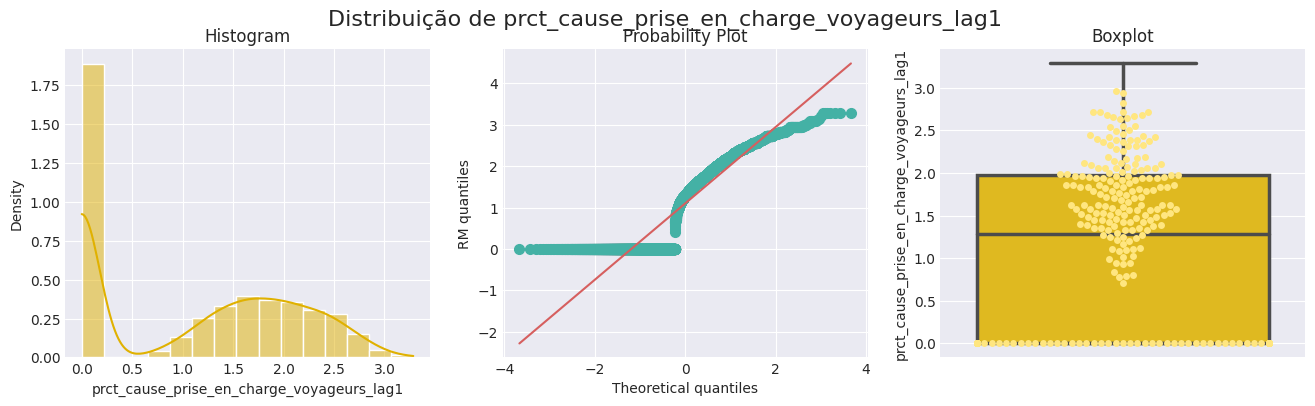

In [ ]:
for feature in numeric_features:
  diagnostic_plots(X_train,feature,'matplotlib')

From the figures, we can see that many distributions, although not normal, tend not to be asymmetrical.

## Outliers

We also noticed after the transformations that the variables still have outliers. However, treating these outliers may represent a loss of information. We will therefore choose not to treat these outliers, as removing them could mean a huge loss of information.

## Feature Scalling

As we prefer to keep the outliers in the previous section, we will then use the RobustScaler, which is robust to outliers.

To do this, let's visualize the MonthlyIncome variable before the transformation:

In [ ]:
numeric_features

['month',
 'nb_train_prevu',
 'duree_moyenne_lag1',
 'nb_train_prevu_lag1',
 'nb_annulation_lag1',
 'nb_train_depart_retard_lag1',
 'retard_moyen_depart_lag1',
 'retard_moyen_tous_trains_depart_lag1',
 'nb_train_retard_arrivee_lag1',
 'retard_moyen_arrivee_lag1',
 'retard_moyen_tous_trains_arrivee_lag1',
 'nb_train_retard_sup_15_lag1',
 'retard_moyen_trains_retard_sup15_lag1',
 'nb_train_retard_sup_30_lag1',
 'nb_train_retard_sup_60_lag1',
 'prct_cause_externe_lag1',
 'prct_cause_infra_lag1',
 'prct_cause_gestion_trafic_lag1',
 'prct_cause_materiel_roulant_lag1',
 'prct_cause_gestion_gare_lag1',
 'prct_cause_prise_en_charge_voyageurs_lag1']

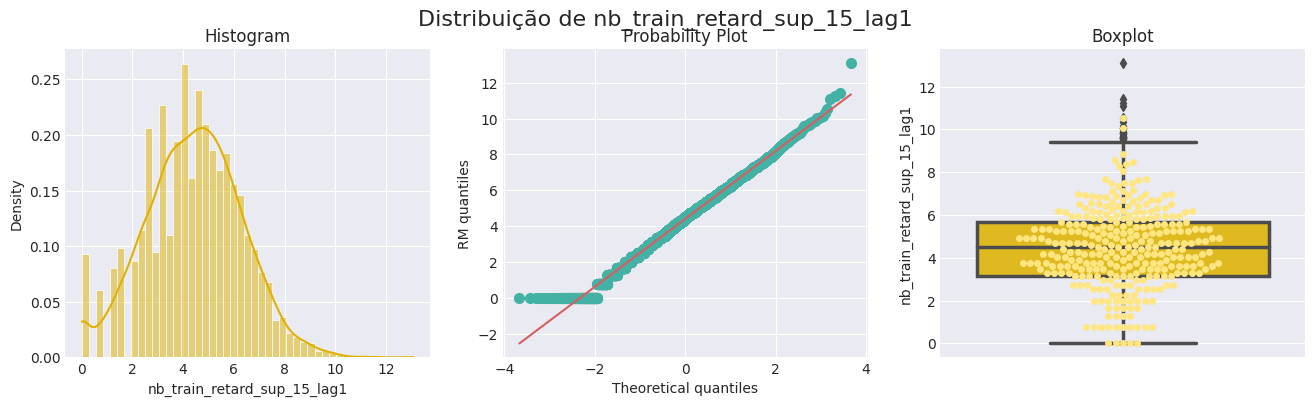

In [ ]:
diagnostic_plots(X_train,'nb_train_retard_sup_15_lag1','matplotlib')

In [ ]:
scaler=RobustScaler()

scaler.fit(X_train)

X_train=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns,index=X_train.index)
X_valid=pd.DataFrame(scaler.transform(X_valid),columns=X_valid.columns,index=X_valid.index)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

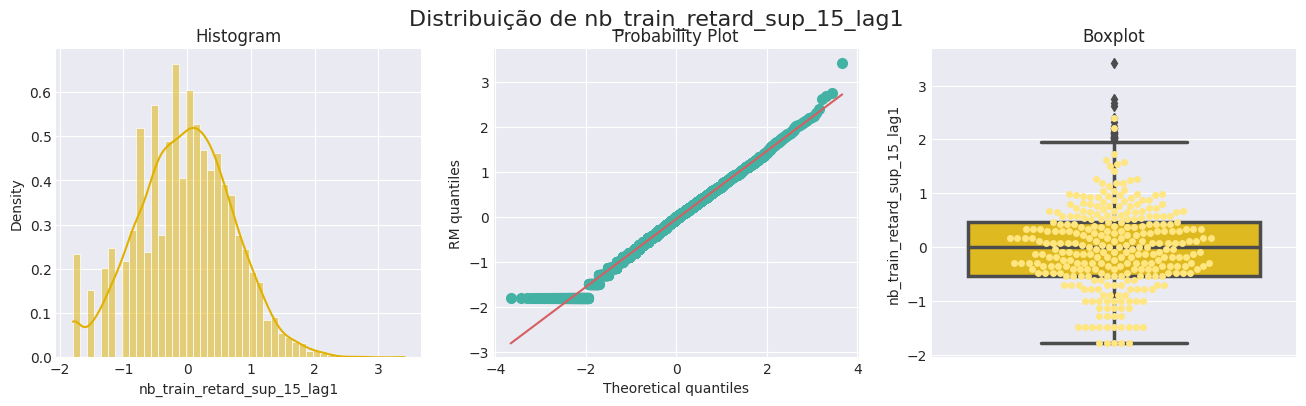

In [ ]:
diagnostic_plots(X_train,'nb_train_retard_sup_15_lag1','matplotlib')

We can see that most of the samples are between -1 and 1, with the outliers having a module greater than 2.

# Pre-feature selection:

## Constant and Quasi-Constants Features:

Let's remove the variables that have equal values in more than 99% of the instances:



In [ ]:
drop_const_feat = DropConstantFeatures(tol=0.999)
drop_const_feat.fit(X_train)
drop_const_feat.features_to_drop_

['duree_moyenne_lag1_na',
 'nb_train_prevu_lag1_na',
 'nb_annulation_lag1_na',
 'nb_train_depart_retard_lag1_na',
 'retard_moyen_depart_lag1_na',
 'retard_moyen_tous_trains_depart_lag1_na',
 'nb_train_retard_arrivee_lag1_na',
 'retard_moyen_arrivee_lag1_na',
 'retard_moyen_tous_trains_arrivee_lag1_na',
 'nb_train_retard_sup_15_lag1_na',
 'retard_moyen_trains_retard_sup15_lag1_na',
 'nb_train_retard_sup_30_lag1_na',
 'nb_train_retard_sup_60_lag1_na',
 'prct_cause_externe_lag1_na',
 'prct_cause_infra_lag1_na',
 'prct_cause_gestion_trafic_lag1_na',
 'prct_cause_materiel_roulant_lag1_na',
 'prct_cause_gestion_gare_lag1_na',
 'prct_cause_prise_en_charge_voyageurs_lag1_na']

In [ ]:
X_train=drop_const_feat.transform(X_train)
X_valid=drop_const_feat.transform(X_valid)
X_test=drop_const_feat.transform(X_test)

In [ ]:
X_train

month  service  gare_depart  gare_arrivee  nb_train_prevu  \
0    -0.341711      0.0    -1.061536      0.000000       -0.238370   
1     0.629949      0.0    -1.061536      0.000000        0.267163   
3    -0.711403      0.0     0.000000      0.000000        0.290823   
4    -0.522254      0.0     0.788591      5.535635        0.099500   
5     0.163227      0.0     0.788591      0.000000        0.130005   
...        ...      ...          ...           ...             ...   
5702 -0.341711      0.0     0.000000      0.000000        0.831010   
5703 -0.711403      0.0    -0.783460     -1.696214        0.160099   
5704  0.779245      0.0    -0.828146      0.000000        0.570771   
5705 -0.168025      0.0    -1.061536      0.466610        0.135049   
5706  0.163227      0.0    -0.518202      0.000000        0.016019   

      service_lag1  duree_moyenne_lag1  nb_train_prevu_lag1  \
0              0.0           -0.825088            -0.245016   
1              0.0           -1.149623             0.407703   
3              0.0            0.147964             0.334358   
4              0.0            0.374925             0.160740   
5              0.0            0.513348             0.140632   
...            ...                 ...                  ...   
5702           0.0            0.155550             0.758067   
5703           0.0            0.437923            -0.005385   
5704           0.0            0.047541             0.509534   
5705           0.0           -0.385968             0.175706   
5706           0.0           -0.259608             0.099877   

      nb_annulation_lag1  nb_train_depart_retard_lag1  ...  \
0               0.775621                    -0.538768  ...   
1               0.210617                     0.410011  ...   
3              -0.192944                    -0.432465  ...   
4              -0.585331                    -0.207495  ...   
5               0.000000                     0.572654  ...   
...                  ...                          ...  ...   
5702           -0.585331                    -0.472670  ...   
5703            0.000000                    -0.562635  ...   
5704           -0.192944                     0.637001  ...   
5705           -0.585331                     0.610007  ...   
5706            0.770039                     0.460585  ...   

      nb_train_retard_sup_15_lag1  retard_moyen_trains_retard_sup15_lag1  \
0                       -0.348811                              -0.952080   
1                       -0.088891                               0.109236   
3                        0.082500                               0.595115   
4                        0.396538                              -0.877380   
5                       -0.185471                              -0.130562   
...                           ...                                    ...   
5702                     0.232038                              -1.038689   
5703                     0.196354                               0.862271   
5704                     0.121669                               0.338636   
5705                    -0.043575                              -0.019464   
5706                     0.485937                              -0.723394   

      nb_train_retard_sup_30_lag1  nb_train_retard_sup_60_lag1  \
0                       -0.337070                    -0.562488   
1                        0.000000                     0.176203   
3                        0.325725                     0.437512   
4                        0.518527                     0.318445   
5                       -0.100239                    -0.562488   
...                           ...                          ...   
5702                     0.175310                    -0.230643   
5703                     0.576071                     0.780400   
5704                     0.000000                     0.000000   
5705                     0.000000                    -0.562488   
5706                     0.

## Duplicated Features

In [ ]:
# set up the transformer
drop_dupl_feat = DropDuplicateFeatures()

# fit the transformer
drop_dupl_feat.fit(X_train)

drop_dupl_feat.features_to_drop_

set()

In [ ]:
X_train=drop_dupl_feat.transform(X_train)
X_valid=drop_dupl_feat.transform(X_valid)
X_test=drop_dupl_feat.transform(X_test)

In [ ]:
X_train

month  service  gare_depart  gare_arrivee  nb_train_prevu  \
0    -0.341711      0.0    -1.061536      0.000000       -0.238370   
1     0.629949      0.0    -1.061536      0.000000        0.267163   
3    -0.711403      0.0     0.000000      0.000000        0.290823   
4    -0.522254      0.0     0.788591      5.535635        0.099500   
5     0.163227      0.0     0.788591      0.000000        0.130005   
...        ...      ...          ...           ...             ...   
5702 -0.341711      0.0     0.000000      0.000000        0.831010   
5703 -0.711403      0.0    -0.783460     -1.696214        0.160099   
5704  0.779245      0.0    -0.828146      0.000000        0.570771   
5705 -0.168025      0.0    -1.061536      0.466610        0.135049   
5706  0.163227      0.0    -0.518202      0.000000        0.016019   

      service_lag1  duree_moyenne_lag1  nb_train_prevu_lag1  \
0              0.0           -0.825088            -0.245016   
1              0.0           -1.149623             0.407703   
3              0.0            0.147964             0.334358   
4              0.0            0.374925             0.160740   
5              0.0            0.513348             0.140632   
...            ...                 ...                  ...   
5702           0.0            0.155550             0.758067   
5703           0.0            0.437923            -0.005385   
5704           0.0            0.047541             0.509534   
5705           0.0           -0.385968             0.175706   
5706           0.0           -0.259608             0.099877   

      nb_annulation_lag1  nb_train_depart_retard_lag1  ...  \
0               0.775621                    -0.538768  ...   
1               0.210617                     0.410011  ...   
3              -0.192944                    -0.432465  ...   
4              -0.585331                    -0.207495  ...   
5               0.000000                     0.572654  ...   
...                  ...                          ...  ...   
5702           -0.585331                    -0.472670  ...   
5703            0.000000                    -0.562635  ...   
5704           -0.192944                     0.637001  ...   
5705           -0.585331                     0.610007  ...   
5706            0.770039                     0.460585  ...   

      nb_train_retard_sup_15_lag1  retard_moyen_trains_retard_sup15_lag1  \
0                       -0.348811                              -0.952080   
1                       -0.088891                               0.109236   
3                        0.082500                               0.595115   
4                        0.396538                              -0.877380   
5                       -0.185471                              -0.130562   
...                           ...                                    ...   
5702                     0.232038                              -1.038689   
5703                     0.196354                               0.862271   
5704                     0.121669                               0.338636   
5705                    -0.043575                              -0.019464   
5706                     0.485937                              -0.723394   

      nb_train_retard_sup_30_lag1  nb_train_retard_sup_60_lag1  \
0                       -0.337070                    -0.562488   
1                        0.000000                     0.176203   
3                        0.325725                     0.437512   
4                        0.518527                     0.318445   
5                       -0.100239                    -0.562488   
...                           ...                          ...   
5702                     0.175310                    -0.230643   
5703                     0.576071                     0.780400   
5704                     0.000000                     0.000000   
5705                     0.000000                    -0.562488   
5706                     0.

# Saving the processed data

In [ ]:
for column in ['year','retard_moyen_trains_retard_sup15','prct_cause_externe_lag1','prct_cause_infra_lag1','prct_cause_gestion_trafic_lag1','prct_cause_materiel_roulant_lag1','prct_cause_gestion_gare_lag1','prct_cause_prise_en_charge_voyageurs_lag1']:

  X_train[column]=y_train[column]
  X_valid[column]=y_valid[column]
  X_test[column]=y_test[column]

In [ ]:
for column in ['prct_cause_externe_lag1','prct_cause_infra_lag1','prct_cause_gestion_trafic_lag1','prct_cause_materiel_roulant_lag1','prct_cause_gestion_gare_lag1','prct_cause_prise_en_charge_voyageurs_lag1']:
  X_train[column]=X_train[column]/100
  X_valid[column]=X_valid[column]/100
  X_test[column]=X_test[column]/100

In [ ]:
y_train

year  retard_moyen_trains_retard_sup15  \
0     2018                          3.827622   
1     2019                         35.009375   
3     2021                         54.936111   
4     2019                          5.732621   
5     2020                         21.944444   
...    ...                               ...   
5702  2019                         49.581667   
5703  2022                         38.272727   
5704  2022                         36.001852   
5705  2019                         45.370370   
5706  2018                          7.185648   

                            commentaires_retard_arrivee  \
0                                                   NaN   
1                                                   NaN   
3                                                   NaN   
4                                                   NaN   
5                                                   NaN   
...                                                 ...   
5702  Heurt de personnes à Vianges, Heurt animal Cuy...   
5703                                                NaN   
5704                                                NaN   
5705                                                NaN   
5706                                                NaN   

                       commentaires_retard_arrivee_lag1  \
0     Ce mois-ci, l'OD a été touchée par la grève (1...   
1                                                   NaN   
3                                                   NaN   
4     Incendie motrice à cluny, colis suspect à Vale...   
5                                                   NaN   
...                                                 ...   
5702                                                NaN   
5703                                                NaN   
5704                                                NaN   
5705                                                NaN   
5706  Ce mois-ci, l'OD a été touchée par 2 journées ...   

      commentaire_annulation  commentaire_annulation_lag1  \
0                        NaN                          NaN   
1                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
5                        NaN                          NaN   
...                      ...                          ...   
5702                     NaN                          NaN   
5703                     NaN                          NaN   
5704                     NaN                          NaN   
5705                     NaN                          NaN   
5706                     NaN                          NaN   

      commentaire_retards_depart  commentaire_retards_depart_lag1  \
0                            NaN                              NaN   
1                            NaN                              NaN   
3                            NaN                              NaN   
4                            NaN                              NaN   
5                            NaN                              NaN   
...                          ...                              ...   
5702                         NaN                              NaN   
5703                         NaN                              NaN   
5704                         NaN                              NaN   
5705                         NaN                              NaN   
5706                         NaN                              NaN   

      prct_cause_externe_lag1  prct_cause_infra_lag1  \
0                   33.333333              20.833333   
1                   29.787234              21.276596   
3                   27.272727              13.636364   
4                   24.137931              13.793103   
5                   46.666667              20.000000   
...                       ...                    ...   
5702                21.052632              15.789474   
5

In [ ]:
for column in y_train.columns:
  X_train[column]=y_train[column]/100
  X_valid[column]=y_valid[column]/100
  X_test[column]=y_test[column]/100

In [ ]:

X_train.to_csv('/content/drive/MyDrive/ML-3A/Data/processed_train.csv',index=False)
X_valid.to_csv('/content/drive/MyDrive/ML-3A/Data/processed_validation.csv',index=False)
X_test.to_csv('/content/drive/MyDrive/ML-3A/Data/processed_test.csv',index=False)

In [ ]:
X_train

month  nb_train_retard_arrivee  retard_moyen_arrivee  \
0     0.736794                -0.923968              0.811477   
1     0.600249                 1.758577             -1.204896   
2     0.600249                 0.818992              0.515376   
3    -0.752956                 0.369736              1.099202   
4     0.312528                -0.188525              0.742618   
...        ...                      ...                   ...   
5702 -0.347840                 0.258441              0.616213   
5703  0.869204                -0.923968              0.769683   
5704  0.159874                 1.650640              1.078928   
5705  0.312528                 0.993190              0.256871   
5706 -0.168551                -0.608053              2.556331   

      retard_moyen_tous_trains_arrivee  duree_moyenne_lag1  \
0                             1.881064            0.395045   
1                             0.179505           -0.946468   
2                             0.351472            0.229975   
3                             1.444880            0.192882   
4                             0.224560           -0.268569   
...                                ...                 ...   
5702                          0.245398           -0.233429   
5703                         -0.380575            0.498254   
5704                          2.596783            0.237339   
5705                          0.977439           -0.259737   
5706                          8.260870            1.484021   

      nb_annulation_lag1  retard_moyen_trains_retard_sup15_lag1  year  \
0              -0.654099                              -0.016378  2020   
1              -0.654099                              -1.095557  2018   
2              -0.116627                               0.388133  2022   
3               0.000000                              -0.905426  2019   
4               0.149918                              -0.970480  2018   
...                  ...                                    ...   ...   
5702            0.394580                              -0.041003  2021   
5703            0.084505                               0.412962  2020   
5704           -0.654099                               0.491878  2022   
5705           -0.296944                              -0.560440  2018   
5706           -0.654099                               0.034748  2022   

      retard_moyen_trains_retard_sup15  prct_cause_externe_lag1  \
0                            46.625000                 0.150000   
1                             5.780940                 0.075758   
2                            41.359950                 0.229508   
3                            11.054009                 0.315789   
4                             5.982875                 0.250000   
...                                ...                      ...   
5702                         48.781183                 0.153846   
5703                         45.875000                 0.000000   
5704                         51.475604                 0.201754   
5705                          9.186368                 0.202128   
5706                         79.680303                 0.600000   

      prct_cause_infra_lag1  prct_cause_gestion_trafic_lag1  \
0                  0.450000                        0.100000   
1                  0.318182                        0.378788   
2                  0.114754                        0.114754   
3                  0.131579                        0.394737   
4                  0.350000                        0.050000   
...                     ...                             ...   
5702               0.282051                        0.102564   
5703               0.000000                        0.000000   
5704               0.149123                        0.114035   
5705               0.297872                        0.276596   
5706               0.000000                        0.200000   

      prct_cause_materiel_roulant_lag1  prct

In [ ]:
X_test

month  nb_train_retard_arrivee  retard_moyen_arrivee  \
0   -1.128896                 0.168773              0.700961   
1   -1.128896                -0.198010              0.191864   
2   -1.128896                 1.712350              0.842625   
3   -1.128896                 0.926393              0.049775   
4   -1.128896                 0.895958             -0.290177   
..        ...                      ...                   ...   
721 -0.168025                 1.370316             -0.106139   
722 -0.168025                 0.269472              2.485922   
723 -0.168025                 0.168773              0.811825   
724 -0.168025                 1.491822              0.562867   
725 -0.168025                 0.428466              0.592843   

     duree_moyenne_lag1  nb_annulation_lag1  \
0              0.200674            0.447431   
1              0.613614            0.501628   
2             -0.173076            0.997268   
3              0.125089            0.671606   
4             -0.589187            0.724259   
..                  ...                 ...   
721           -0.404568            0.210617   
722            0.774726           -0.585331   
723           -0.791218           -0.585331   
724           -0.233342            0.277981   
725            0.039672           -0.585331   

     retard_moyen_trains_retard_sup15_lag1  
0                                 0.126949  
1                                -0.191564  
2                                 0.225861  
3                                -0.030764  
4                                -0.044510  
..                                     ...  
721                               0.228703  
722                               0.531339  
723                              -0.196265  
724                               0.659753  
725                              -0.007812  

[726 rows x 6 columns]

# Next Steps...

Now that we've processed our data, we're ready to test various machine learning models and find the best mathematical relationship between the target variable and the explanatory variables.